# Omniglot

In this example, we'll demonstrate how to use [dataduit](https://github.com/JackBurdick/dataduit) to create tensorflow datasets from the readily available tfdataset by specifying a config file.

We'll then demonstrate how to use yeahml to create/build/evaluate a model on the created data.

#### Note:
> The model for this project likely doesn't make sense. I am not personally familiar with the dataset/problem, I was interested showing an example

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import pandas as pd
import tensorflow as tf
import dataduit as dd
import yeahml as yml
import matplotlib.pyplot as plt

/home/jackburdick/anaconda3/envs/tf2/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.10) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Create Datasets

In [3]:
# I'm creating a different split than what is located here:
# https://www.tensorflow.org/datasets/catalog/omniglot
dd_dict = {
    "meta": {
        "name": "omniglot",
        "logging": {"log_stream_level": "INFO"},
        "in": {"from": "online", "type": "tfd"},
    },
    "read": {
        "split_percents": [75, 15, 10],
        "split_names": ["train", "val", "test"],
        "from_stage": "preprocessed"
    },
}

In [4]:
# create the datasets based on the above defined names/splits/specifed data
ds_dict_raw = dd.read(dd_dict)[0]

root dir set to None
as_supervised set to False
with_info set to False


dict_keys(['alphabet', 'alphabet_char_id', 'image', 'label'])


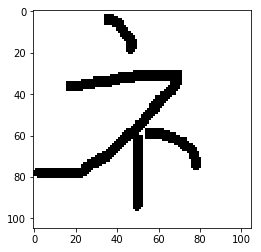

In [5]:
# verify / check data
for x in ds_dict_raw["train"].take(1):
    plt.imshow(x['image'])
    print(x.keys())

## alter dataset

In [6]:
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255.0, label

In [7]:
def load_image(datapoint):

    input_image, input_mask = normalize_img(datapoint["image"], datapoint["label"])

    return input_image, input_mask

In [8]:
for k, cur_ds in ds_dict_raw.items():
    
    cur_ds = cur_ds.map(
            load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE
        )

    ds_dict_raw[k] = cur_ds

In [9]:
ds_dict = {"omni": ds_dict_raw}

In [10]:
ds_dict

{'omni': {'train': <ParallelMapDataset shapes: ((105, 105, 3), ()), types: (tf.float32, tf.int64)>,
  'val': <ParallelMapDataset shapes: ((105, 105, 3), ()), types: (tf.float32, tf.int64)>,
  'test': <ParallelMapDataset shapes: ((105, 105, 3), ()), types: (tf.float32, tf.int64)>}}

## subset

In [11]:
sample_size = 1000
for ds_name, cur_dict in ds_dict.items():
    for split_name, split_ds in cur_dict.items():
        ds_dict[ds_name][split_name] = split_ds.take(sample_size)

## Specify the Model

In [12]:
# example = "./main_config.yml"
# yml_dict = yml.create_configs(example)

## Build the model

In [13]:
# If you receive an error:
# AttributeError: 'google.protobuf.pyext._message.RepeatedCompositeCo' object has no attribute 'append'
# I personally used `pip install -U protobuf=3.8.0` to resolve
# per https://github.com/tensorflow/tensorflow/issues/33348
# model = yml.build_model(yml_dict)

In [14]:
# model.summary()

## Train the Model

Notice here that we're using the created training and validation sets from `ds_dict`

In [15]:
# ds_dict

In [16]:
# %%time
# # roughly 69 seconds vs 116 seconds 5 epoch mnist -- not a real benchmark (23April19)
# # roughly 69 seconds vs 101 seconds 5 epoch mnist -- not a real benchmark (24April19)
# train_dict = yml.train_model(model, yml_dict, ds_dict)

In [17]:
# yml.basic_plot_tracker(
#     train_dict["tracker"],
#     metrics=True,
#     local=False,
#     training=True,
#     validation=False,
#     loss=True,
#     size=(16, 8),
# )

In [18]:
# yml.basic_plot_tracker(
#     train_dict["tracker"],
#     metrics=True,
#     local=False,
#     training=False,
#     validation=True,
#     loss=True,
#     size=(16, 8),
# )

## Evaluate the Model

In [19]:
# eval_dict = yml.eval_model(
#     model,
#     yml_dict,
#     dataset=ds_dict["test"]
# )
# print(eval_dict)

## Inspect model in Tensorflow

In the command line you can navigate to the `albalone` directory and run: (provided tensorboard is installed in your environment)

```bash
tensorboard --logdir model_a/
```